#Importing Essential Libraries

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,make_scorer

#Reading the Dataset

In [52]:
df=pd.read_csv("customer_churn_data.csv",encoding='latin1')
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


#Handling Missing Values

In [54]:
print(df.isnull().sum())
print(df.duplicated().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64
0


In [55]:
df['InternetService']= df['InternetService'].fillna("")

In [56]:
print(df.isnull().sum())

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64


In [57]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


#Exploratory Data Analysis (EDA) & Visualization

In [58]:
corr= df.corr(numeric_only=True)
corr

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


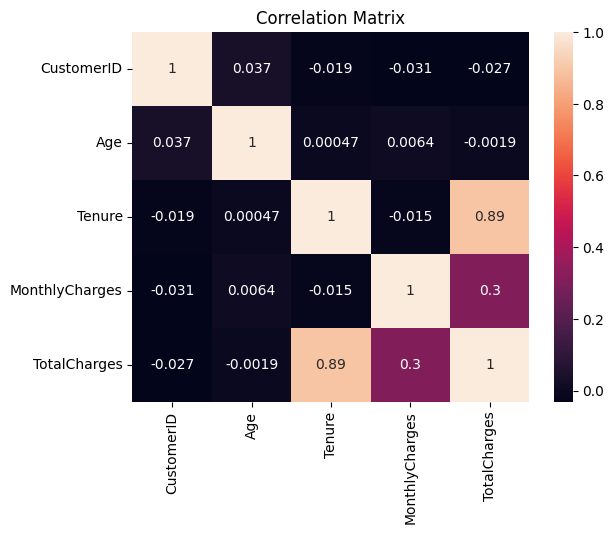

In [59]:
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [60]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [61]:
df.groupby(['Churn','Age'])['Tenure'].mean()

Churn  Age
No     20     15.0
       24     16.0
       25     23.0
       28     17.5
       29     16.5
              ... 
Yes    70     19.0
       71     13.0
       72     40.0
       75     15.0
       83      2.0
Name: Tenure, Length: 94, dtype: float64

In [62]:
df.groupby('Churn')['TotalCharges'].mean()

Churn
No     1842.510256
Yes    1346.308448
Name: TotalCharges, dtype: float64

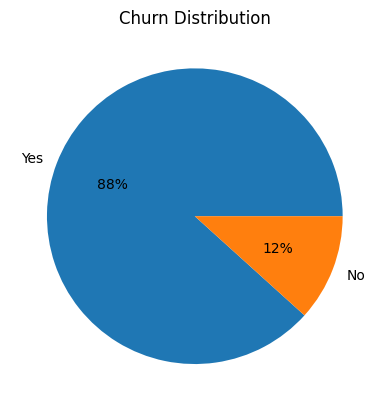

In [63]:
counts= df['Churn'].value_counts()
plt.pie(counts,labels=counts.index,autopct='%1.0f%%')
plt.title("Churn Distribution")
plt.show()

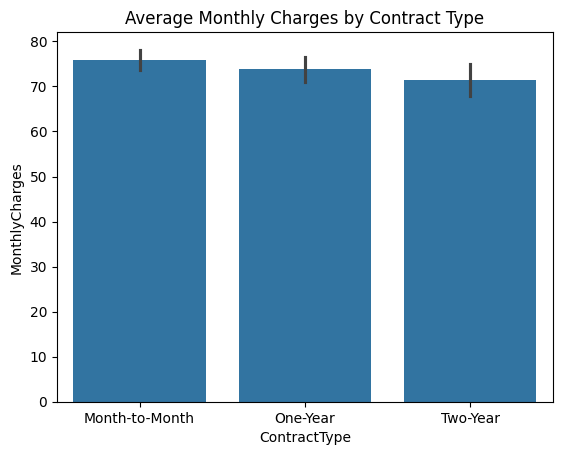

In [64]:
sns.barplot(x='ContractType', y='MonthlyCharges', data=df)
plt.title("Average Monthly Charges by Contract Type")
plt.show()

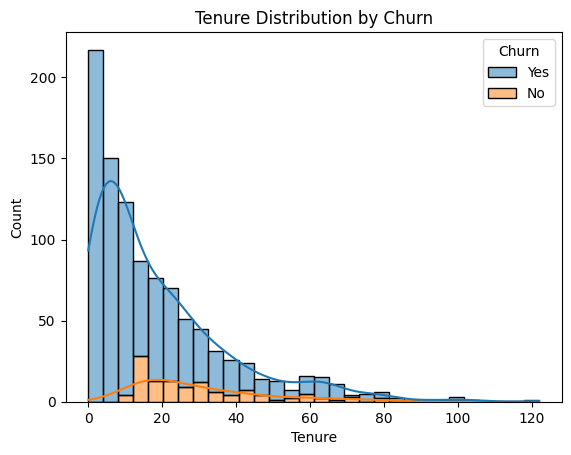

In [65]:
sns.histplot(data=df,x='Tenure',hue='Churn',bins=30,multiple='stack',kde=True)
plt.title("Tenure Distribution by Churn")
plt.show()

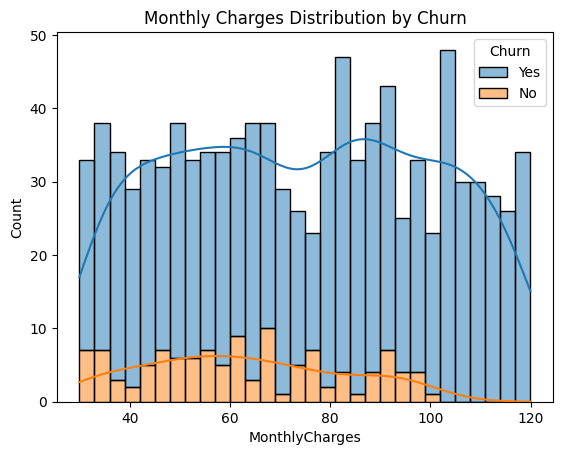

In [66]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30,kde=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

In [67]:
df.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


In [68]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

#Label Encoding

In [69]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df['Gender'])
df["Churn"]=le.fit_transform(df['Churn'])

In [70]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,1,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,1
1,2,43,1,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,1
2,3,51,0,2,63.79,Month-to-Month,Fiber Optic,127.58,No,1
3,4,60,0,8,102.34,One-Year,DSL,818.72,Yes,1
4,5,42,1,32,69.01,Month-to-Month,,2208.32,No,1


#Splitting the Data into Features (X) and Target (y)

In [71]:
X=df[['Age', 'Gender',  'Tenure', 'MonthlyCharges']]
y=df['Churn']

In [72]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,1,4,88.35
1,43,1,0,36.67
2,51,0,2,63.79
3,60,0,8,102.34
4,42,1,32,69.01
...,...,...,...,...
995,42,1,41,37.14
996,62,1,9,80.93
997,51,0,15,111.72
998,39,1,68,65.67


In [73]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

#Model Building & Training

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

#Saving the Scaler Model for Transforming Test Data

In [76]:
import joblib
joblib.dump(sc,'scaler.pkl')

['scaler.pkl']

In [77]:
X_test=sc.transform(X_test)

In [78]:
import warnings
warnings.filterwarnings('ignore')

#Defining a function to calculate model scores

In [79]:
def modelscore(y_pred):
    print('Accurracy : ',accuracy_score(y_test,y_pred))
    print('Recall : ', recall_score(y_test,y_pred))
    print('Precision : ', precision_score(y_test,y_pred))
    print('F1 score : ',f1_score(y_test,y_pred))

#Logistic Regression

In [80]:
param_grid={
    'C':[0.1,1,10,100],
    'class_weight':['balanced',None]
}

In [81]:
scorer = make_scorer(f1_score, pos_label=0)

In [82]:
grid_lr=GridSearchCV(LogisticRegression(),param_grid,cv=5,scoring=scorer)
grid_lr.fit(X_train,y_train)
y_pred=grid_lr.predict(X_test)
modelscore(y_pred)

Accurracy :  0.7
Recall :  0.7005649717514124
Precision :  0.9465648854961832
F1 score :  0.8051948051948052


In [83]:
grid_lr.best_params_

{'C': 0.1, 'class_weight': 'balanced'}

#kNeighbors Classifier

In [84]:
param_grid={
    'n_neighbors': [3,5,7,9,11],
    'weights':['uniform','distance']
}

In [85]:
grid_knn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,scoring=scorer)
grid_knn.fit(X_train,y_train)
y_pred=grid_knn.predict(X_test)

In [86]:
grid_knn.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [87]:
modelscore(y_pred)

Accurracy :  0.85
Recall :  0.9548022598870056
Precision :  0.8848167539267016
F1 score :  0.9184782608695652


#Random Forest Classifier

In [88]:
param_grid={
    'n_estimators': [3,5,7,9,11],
    'max_features':['auto','sqrt','log2'],
    'class_weight': ['balanced', None]
}

In [89]:
grid_rc=GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring=scorer)
grid_rc.fit(X_train, y_train)  
y_pred=grid_rc.predict(X_test)
modelscore(y_pred)

Accurracy :  0.855
Recall :  0.9548022598870056
Precision :  0.8894736842105263
F1 score :  0.9209809264305178


In [90]:
grid_rc.best_params_

{'class_weight': 'balanced', 'max_features': 'sqrt', 'n_estimators': 9}

#Decision Tree Classifier

In [91]:
param_grid={
    'criterion': ['gini', 'entropy'],
    'splitter':['best','random'],
    'max_depth': [None, 10, 20, 30],
    'class_weight': ['balanced', None]
}

In [92]:
grid_dc=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,scoring=scorer)
grid_dc.fit(X_train,y_train)
y_pred=grid_dc.predict(X_test)
modelscore(y_pred)

Accurracy :  0.77
Recall :  0.7853107344632768
Precision :  0.9455782312925171
F1 score :  0.8580246913580247


In [93]:
grid_dc.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 10,
 'splitter': 'best'}

#Support Vector Classifier (SVM)

In [94]:
svm=SVC()

In [95]:
param_grid={
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf','poly'],
    'class_weight': ['balanced', None]
}

In [96]:
grid_svc=GridSearchCV(svm,param_grid,cv=5,scoring=scorer)
grid_svc.fit(X_train,y_train)
y_pred=grid_svc.predict(X_test)
modelscore(y_pred)

Accurracy :  0.705
Recall :  0.6836158192090396
Precision :  0.9758064516129032
F1 score :  0.8039867109634552


In [97]:
grid_svc.best_params_

{'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}

In [98]:
best_model=grid_svc.best_estimator_

#Saving the Best Model for Future Use

In [99]:
joblib.dump(best_model,'best_model.pkl')

['best_model.pkl']